<img src="images/ex12-1.jpg" width=500 height=1000>
<img src="images/ex12-2.jpg" width=500 height=1000>

In [184]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Race_Env(gym.Env):
    def __init__(self, type_of_env=1):
        ## Some useful properties
        self.action_space = [(-1,-1),(-1,0),(0,-1),(0,1),(1,0),(1,1)]
        self.reward_range = (-1,)
        self.ims = []
        
        ## Init values
        self._Vx = 0  # 0 < _Vx < 5
        self._Vy = 0  # 0 < _Vy < 5
        ## Env Signs
        self.wall_sign = 1
        self.start_sign = 2
        self.endline_sign = 9
        self.agent_sign = 5
        ####
        self.current_row = 0 # will assign them later
        self.current_col = 0 # will assign them later
        if type_of_env == 1:
            w = self.wall_sign
            s = self.start_sign
            e = self.endline_sign
            self.env_row = 32
            self.env_col = 17
            # Making the environment
            self.env = np.zeros((self.env_row,self.env_col), dtype=np.int16)
            ## Walls ##
            self.env[0:3,0:2] = w
            self.env[0,2] = w
            self.env[3,0] = w
            self.env[14:,0] = w
            self.env[22:,1] = w
            self.env[29:,2] = w
            ##
            self.env[6,10:] = w
            self.env[7:,9:] = w
            ###########
            self.env[31, 3:9] = s # Setting the start
            #####
            self.env[0:6,16] = e # Setting the endline
            ## Positioning the agent ##
            self.current_row = 31
            self.current_col = np.random.randint(6)+3
            self.env[self.current_row, self.current_col] = self.agent_sign
            ###########################
        self.reward = -1
    def step(self, action):
        """ Summary or Description of the Function
        
        Parametes:
        action (list): A list of action elements [Vx, Vy]
        
        Returns (tuple): A tuple of obs, reward, done
        """
        """
        if action[0] > 1 or action[0] < -1 or action[1] > 1 or action[1] < -1:
            raise Exception('Actions must be in [-1,1] interval. Action passed {}'.format(action))
        self._Vx += action[0]
        self._Vy += action[1]
        
        self.env[self.current_row,self.current_col] = 0
        self.current_row -= 1
        self.env[self.current_row,self.current_col] = self.agent_sign
        """
        self.env[self.current_row, self.current_col] = 0
        self.current_row -= 1
        self.current_col += 0
        self.env[self.current_row, self.current_col] = self.agent_sign
        im = plt.imshow(self.env, animated=True)
        self.ims.append([im])
        
    def render_text(self):
        print("Wall={}, Start={}, Endline={}, Agent={}".format(self.wall_sign, self.start_sign, self.endline_sign, self.agent_sign))
        for x in range(self.env_row):
            print("r{:2}".format(x), end=" ")
            for y in range(self.env_col):
                print(self.env[x,y],end="")
            print()
    def render(self):
        plt.axis("off")
        fig = plt.gcf()
        #plt.imshow(self.env)
        ani = animation.FuncAnimation(fig, self.ims, frames=200, interval=10000)
        plt.show()
        
    def reset(self):
        self.env[self.current_row, self.current_col] = 0 # Setting the current state to zero
        #####
        self.env[31, 3:9] = self.start_sign # Setting the start
        #
        self.env[0:6,16] = self.endline_sign # Setting the endline
        #####
        self.current_row = 31 # Positioning the agent in row 31
        self.current_col = np.random.randint(6)+3 # Positioning the agent in a random available column
        self.env[self.current_row, self.current_col] = self.agent_sign
        self._Vx = 0  # Resetting velocities Vx
        self._Vy = 0  # Vy
#help(gym.Env)

In [185]:
env = Race_Env()
#env.render()
env.ims

[]

Traceback (most recent call last):
  File "/home/fred/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/fred/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/fred/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/fred/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: 'list' object is not callable


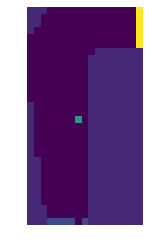

In [190]:
#env.action_space
env = Race_Env()
%matplotlib inline
for i in range(15):
    env.step(1)
    #time.sleep(1)
env.render()

In [187]:
env.ims[1]

# New Envirnment

In [43]:
from collections import namedtuple, defaultdict
import random
import numpy as np
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
MAX_SPEED = 4
N_ACTIONS = 3  # number of actions along x and y: 0, 1, -1

track1 = """
                  
   XXXXXXXXXXXXXF 
  XXXXXXXXXXXXXXF 
  XXXXXXXXXXXXXXF 
 XXXXXXXXXXXXXXXF 
XXXXXXXXXXXXXXXXF 
XXXXXXXXXXXXXXXXF 
XXXXXXXXXX        
XXXXXXXXX         
XXXXXXXXX         
XXXXXXXXX         
XXXXXXXXX         
XXXXXXXXX         
XXXXXXXXX         
XXXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
 XXXXXXXX         
  XXXXXXX         
  XXXXXXX         
  XXXXXXX         
  XXXXXXX         
  XXXXXXX         
  XXXXXXX         
  XXXXXXX         
   XXXXXX         
   XXXXXX         
   SSSSSS         
"""
track2 = """
                                 
                XXXXXXXXXXXXXXXF 
             XXXXXXXXXXXXXXXXXXF 
            XXXXXXXXXXXXXXXXXXXF 
           XXXXXXXXXXXXXXXXXXXXF 
           XXXXXXXXXXXXXXXXXXXXF 
           XXXXXXXXXXXXXXXXXXXXF 
           XXXXXXXXXXXXXXXXXXXXF 
            XXXXXXXXXXXXXXXXXXXF 
             XXXXXXXXXXXXXXXXXXF 
              XXXXXXXXXXXXXXXX   
              XXXXXXXXXXXXX      
              XXXXXXXXXXXX       
              XXXXXXXXXX         
              XXXXXXXXX          
             XXXXXXXXXX          
            XXXXXXXXXXX          
           XXXXXXXXXXXX          
          XXXXXXXXXXXXX          
         XXXXXXXXXXXXXX          
        XXXXXXXXXXXXXXX          
       XXXXXXXXXXXXXXXX          
      XXXXXXXXXXXXXXXXX          
     XXXXXXXXXXXXXXXXXX          
    XXXXXXXXXXXXXXXXXXX          
   XXXXXXXXXXXXXXXXXXXX          
  XXXXXXXXXXXXXXXXXXXXX          
 XXXXXXXXXXXXXXXXXXXXXX          
XXXXXXXXXXXXXXXXXXXXXXX          
XXXXXXXXXXXXXXXXXXXXXXX          
SSSSSSSSSSSSSSSSSSSSSSS          
"""

In [45]:
State = namedtuple('State', ['x', 'y', 'vx', 'vy']) # current position and speed
Action = namedtuple('Action', ['ax', 'ay']) # acceleration along each component
Transition = namedtuple('Transition', ['state1',
                                       'action',
                                       'reward',
                                       'state2'])

In [93]:
class Racetrack(object):
    def __init__(self, track_str=track1):
        rows = track_str.split('\n')
        rows = rows[1:-1] #  remove first and last rows
        rows = rows[::-1] #  flip vertically so [0,0] corresponds to bottom left corner
        cells = map(list, rows) #  convert rows of strings to rows of chars
        self._track = np.array(list(cells))
        
        self._state = None
        
        # define all possible actions
        self.actions = []
        for ax in [-1, 0, 1]:
            for ay in [-1, 0, 1]:
                self.actions.append(Action(ax, ay))

    def _track_cell(self, x, y):
        max_y = self._track.shape[0] - 1
        max_x = self._track.shape[1] - 1
        
        if x < 0 or x > max_x:
            return ' '
        if y < 0 or y > max_y:
            return ' '
        
        return self._track[y, x]
        
    def _is_on_track(self, state):
        assert state.vx <= MAX_SPEED
        assert state.vx >= 0
        assert state.vy <= MAX_SPEED
        assert state.vy >= 0
        
        return self._track_cell(state.x, state.y) != ' '
    def _has_finished(self, state):
        return self._track_cell(state.x, state.y) == 'F'

    def _transition(self, state, action):
        # update speed
        vx2 = state.vx + action.ax
        vy2 = state.vy + action.ay
        
        vx2 = np.clip(vx2, 0, MAX_SPEED)
        vy2 = np.clip(vy2, 0, MAX_SPEED)
        
        # keep the speed constant if both components are zero
        if vx2 == 0 and vy2 == 0:
            vx2, vy2 = state.vx, state.vy
        
        # advance car position
        x2 = state.x + vx2
        y2 = state.y + vy2
        
#         # additional random move
#         if random.random() > 0.5:
#             if random.random() > 0.5:
#                 x2 += 1 # move right
#             else:
#                 y2 += 1 # move forward
        collision_y = collision_x = False
        # check and fix collisions along 'x'
        while True:
            s2 = State(x2, state.y, vx2, vy2)
            if self._is_on_track(s2):
                break
            collision_x = True
            x2 -= 1
            vx2 = 1
            assert x2 >= 0
        
        # check and fix collision along 'y'
        while True:
            s2 = State(x2, y2, vx2, vy2)
            if self._is_on_track(s2):
                break
            collision_y = True
            y2 -= 1
            vy2 = 1
            assert y2 >= 0
            
        if collision_y or collision_x:
            r = -5
        else:
            r = -1

        if state.x == x2 and state.y == y2:
            # the car did not move
            if collision_y:
                x2 += 1
            elif collision_x:
                y2 += 1
            else:
                assert False, 'the car has to move'
        
        s2 = State(x2, y2, vx2, vy2)
        assert self._is_on_track(s2)
        
        term = self._has_finished(s2)
        
        if term:
            r = 0
        self._state = s2
        return r, s2, term

    def reset(self):
        max_x = self._track.shape[1]
        while True:
            x = random.randint(0, max_x)
            vx = random.choice([0, 1])
            vy = random.choice([0, 1])
            if vx == 0 and vy == 0:
                continue
            s = State(x=x, y=0, vx=vx, vy=vy)
            if self._is_on_track(s):
                break
        self._state = s
        return s
        
    def step(self, action):
        r, s2, term = self._transition(self._state, action)
        self._state = s2
        return s2, r, term, _
    
    def track_as_np(self):
        _track = self._track
        track_np = np.zeros_like(_track, dtype=int)
        track_np[_track == 'S'] = 1
        track_np[_track == 'X'] = 2
        track_np[_track == 'F'] = 3
        return track_np
    def render(self):
        t = self._track[::-1]
        track_image = np.zeros(t.shape,dtype='float32')
        for row in range(t.shape[0]):
            for col in range(t.shape[1]):
                if t[row,col] == 'S':
                    track_image[row,col]=3
                elif t[row,col] == 'X':
                    track_image[row,col]=5
                elif t[row,col] == 'F':
                    track_image[row,col]=10
        track_image[]
        print(track_image)
        plt.imshow(track_image)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 0.  0.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 0.  0.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 0.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.

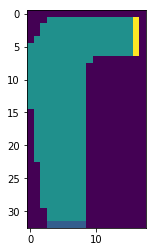

In [100]:
env = Racetrack(track1)
env.reset()
env.render()

In [99]:
env.step(action=[-1,1])
env.render()

AttributeError: 'list' object has no attribute 'ax'

<img src="./images/Off-policy_MC_control.png" width=500 height=1000>

In [8]:
env.reset()
env.render()

Wall=1, Start=2, Endline=9, Agent=5
r 0 11100000000000009
r 1 11000000000000009
r 2 11000000000000009
r 3 10000000000000009
r 4 00000000000000009
r 5 00000000000000009
r 6 00000000001111111
r 7 00000000011111111
r 8 00000000011111111
r 9 00000000011111111
r10 00000000011111111
r11 00000000011111111
r12 00000000011111111
r13 00000000011111111
r14 10000000011111111
r15 10000000011111111
r16 10000000011111111
r17 10000000011111111
r18 10000000011111111
r19 10000000011111111
r20 10000000011111111
r21 10000000011111111
r22 11000000011111111
r23 11000000011111111
r24 11000000011111111
r25 11000000011111111
r26 11000000011111111
r27 11000000011111111
r28 11000000011111111
r29 11100000011111111
r30 11100000011111111
r31 11152222211111111
